## 获取数据

In [1]:
import os
csv_path = os.path.join('..','datasets','housing','housing.csv')

#### 读取csv数据

In [2]:
housing = pd.read_csv(csv_path)

### 快速获取数据结构
#### 头部数据展示

In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 数据具体描述

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 某seq的统计值

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### dataframe的数值型数据列的总结

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 可视化直方图

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109921ef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f89acc0>]], dtype=object)

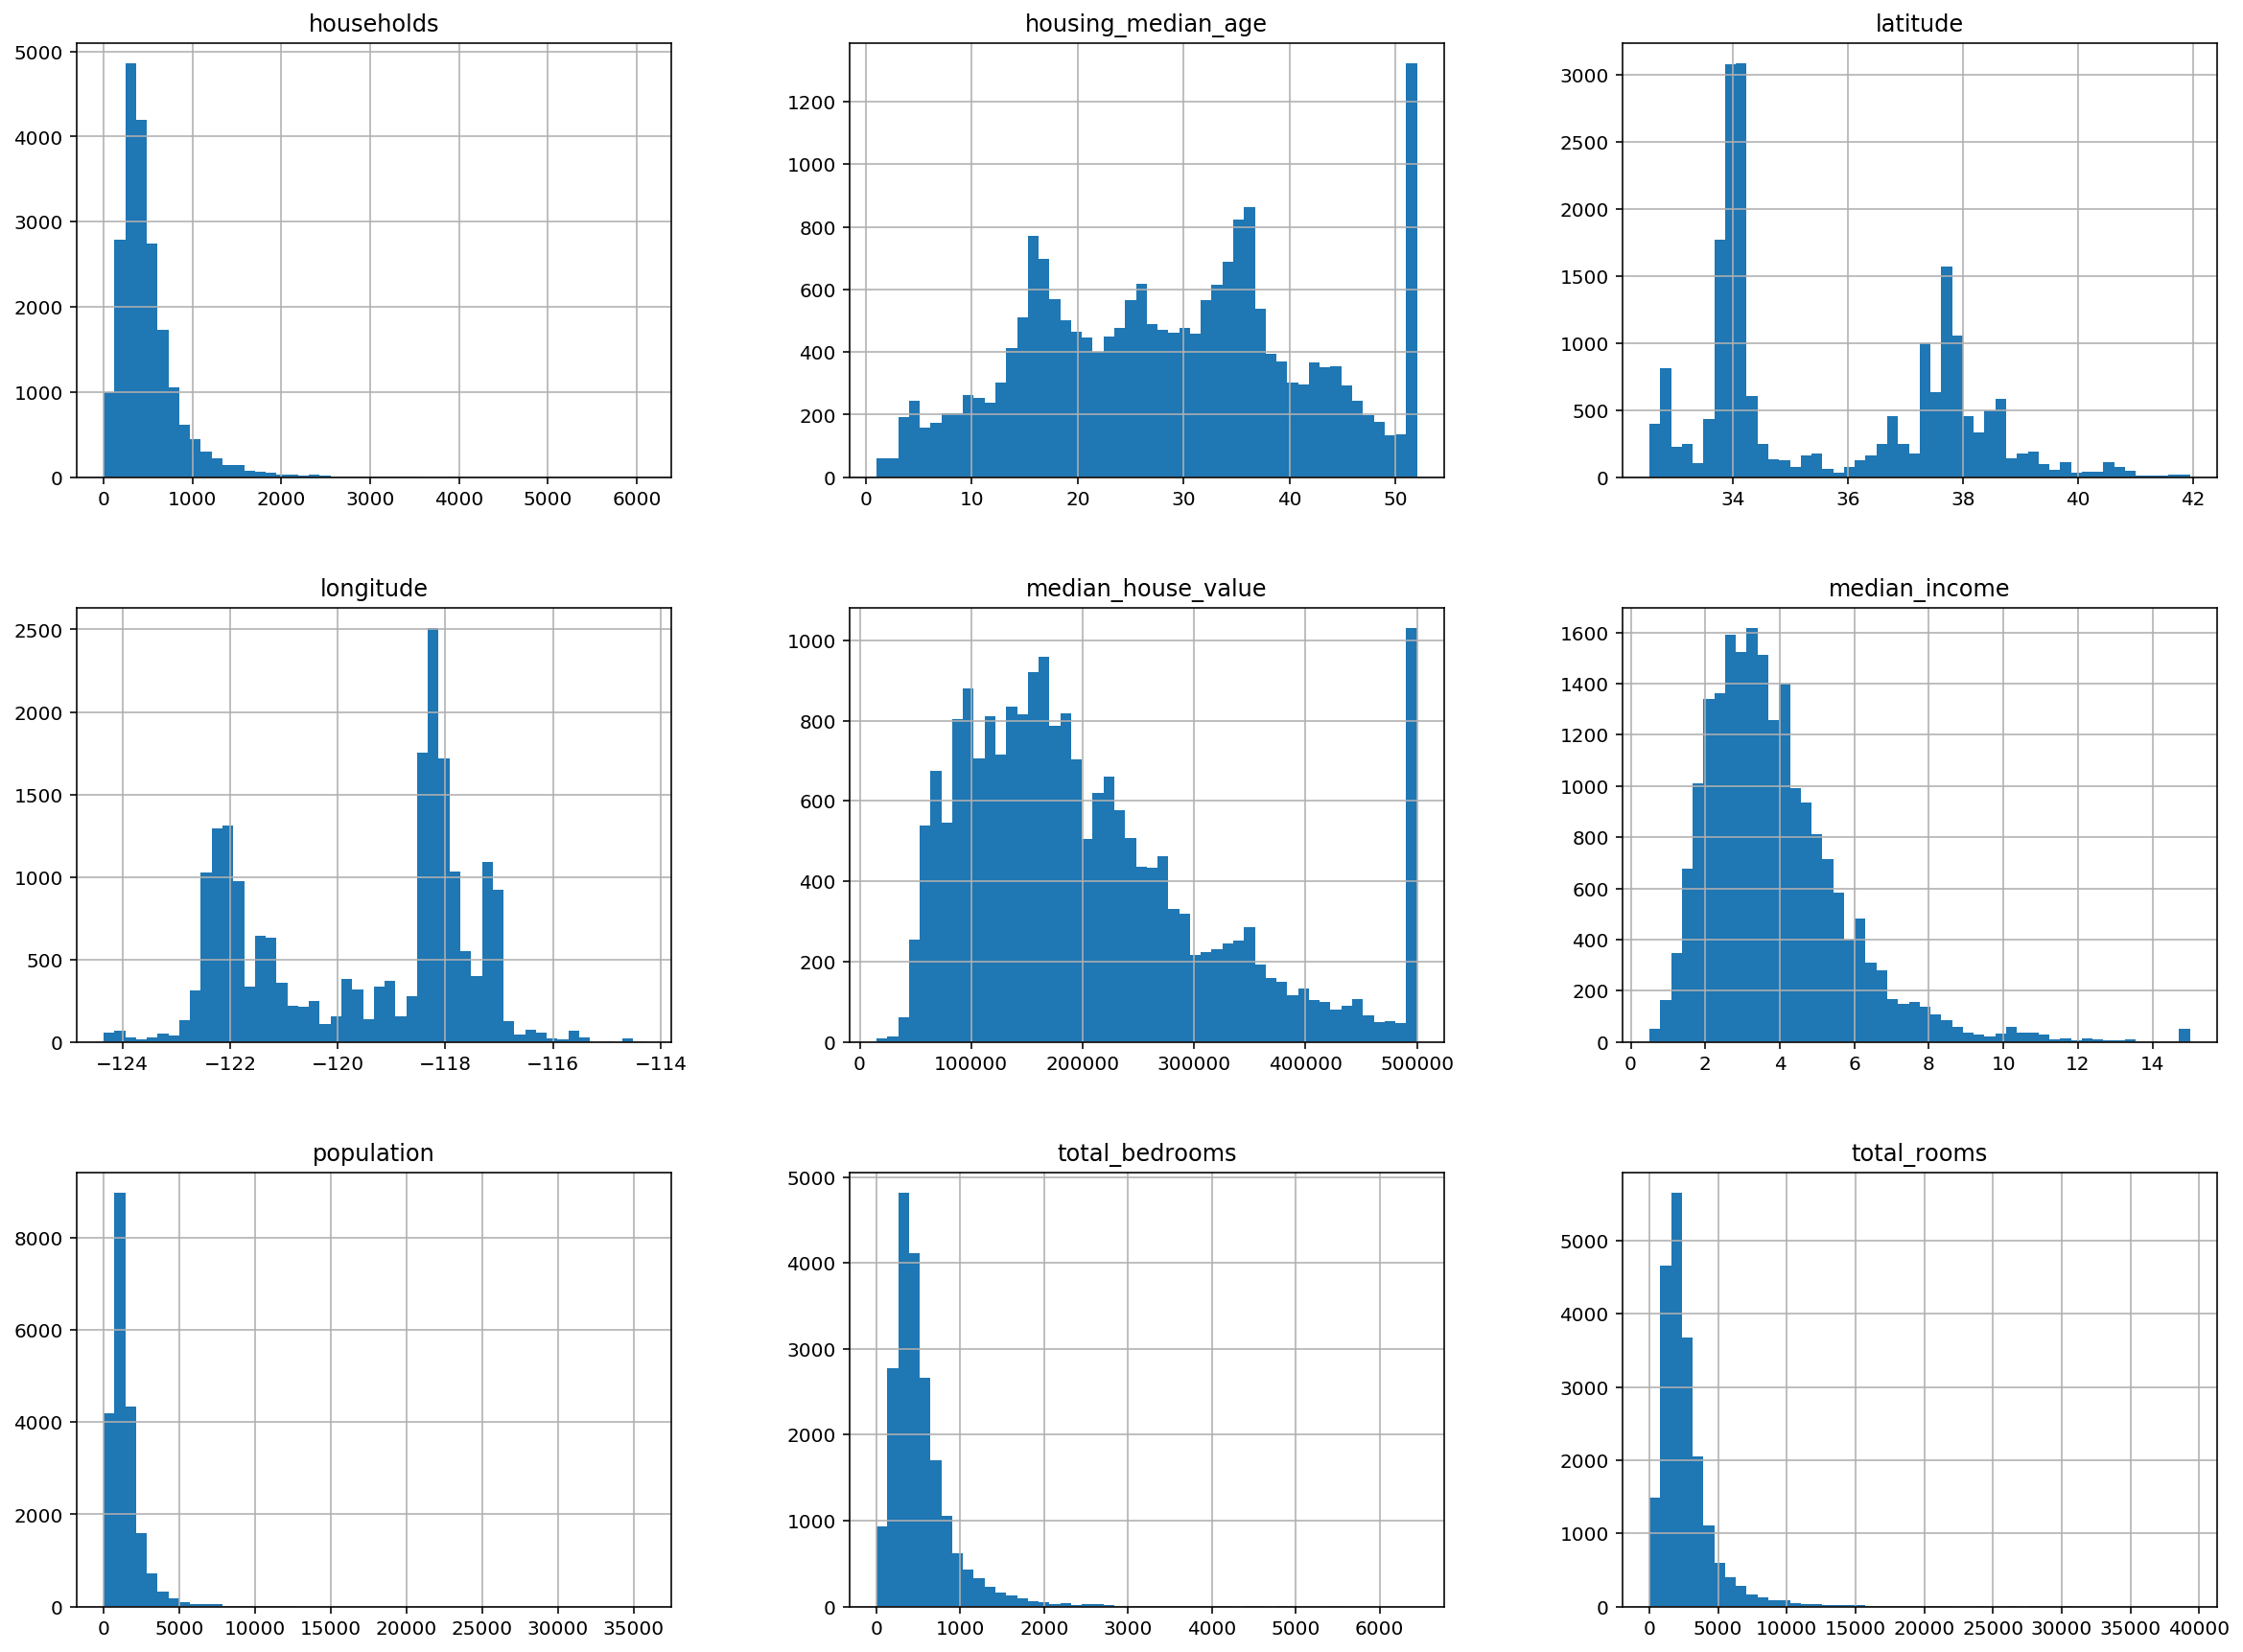

In [7]:
#bins:  这个参数指定bin的个数,也就是总共有几条条状图
housing.hist(bins=50,figsize=(20,15))

#### 对序列做处理

In [8]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Series.where(cond, other=nan, inplace=False, axis=None, level=None, errors=‘raise’, try_cast=False, raise_on_error=None)
#如果 cond 为真，保持原来的值，否则替换为other， inplace为真标识在原数据上操作，为False标识在原数据的copy上操作。
#other must be the same shape as self: other的形状必须与self相同。
housing["income_cat"].where(housing["income_cat"] < 5,5.0,inplace=True )
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


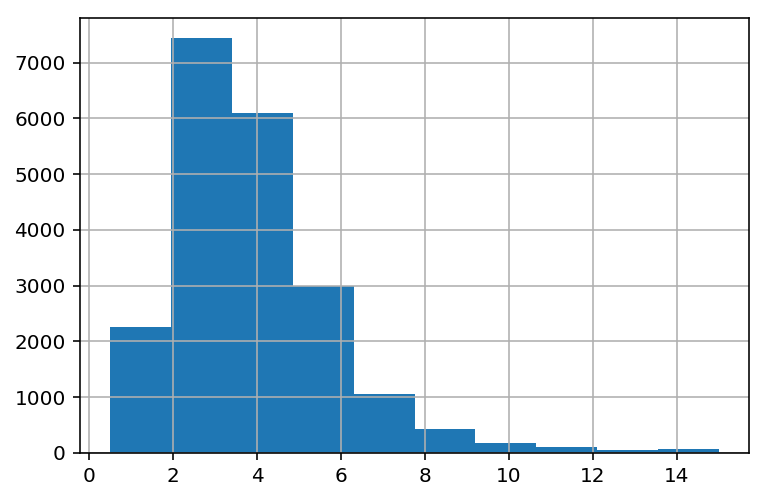

In [9]:
# 某个单列的统计直方图
housing["median_income"].hist()

### 创建测试数据集
#### 分层抽样

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


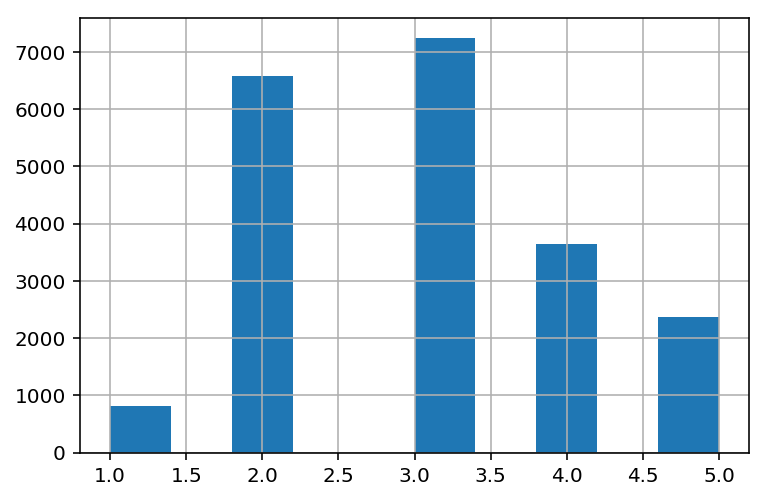

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
#切分器
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
print(housing["income_cat"].value_counts() / len(housing))
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
housing["income_cat"].hist()

In [11]:
for s in (strat_train_set,strat_test_set):
    #默认删除行 axis参数用于表示删除列
    s.drop(["income_cat"],axis=1,inplace=True)

#### 拷贝数据

In [12]:
housing = strat_train_set.copy()
housing.shape

(16512, 10)

## 发现并可视化数据
### 可视化地理数据

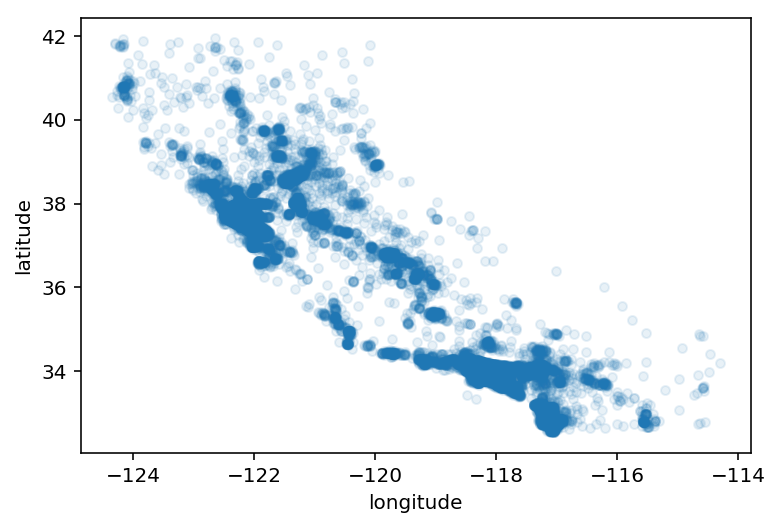

In [13]:
#根据某2列话散点图,alpha密度
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

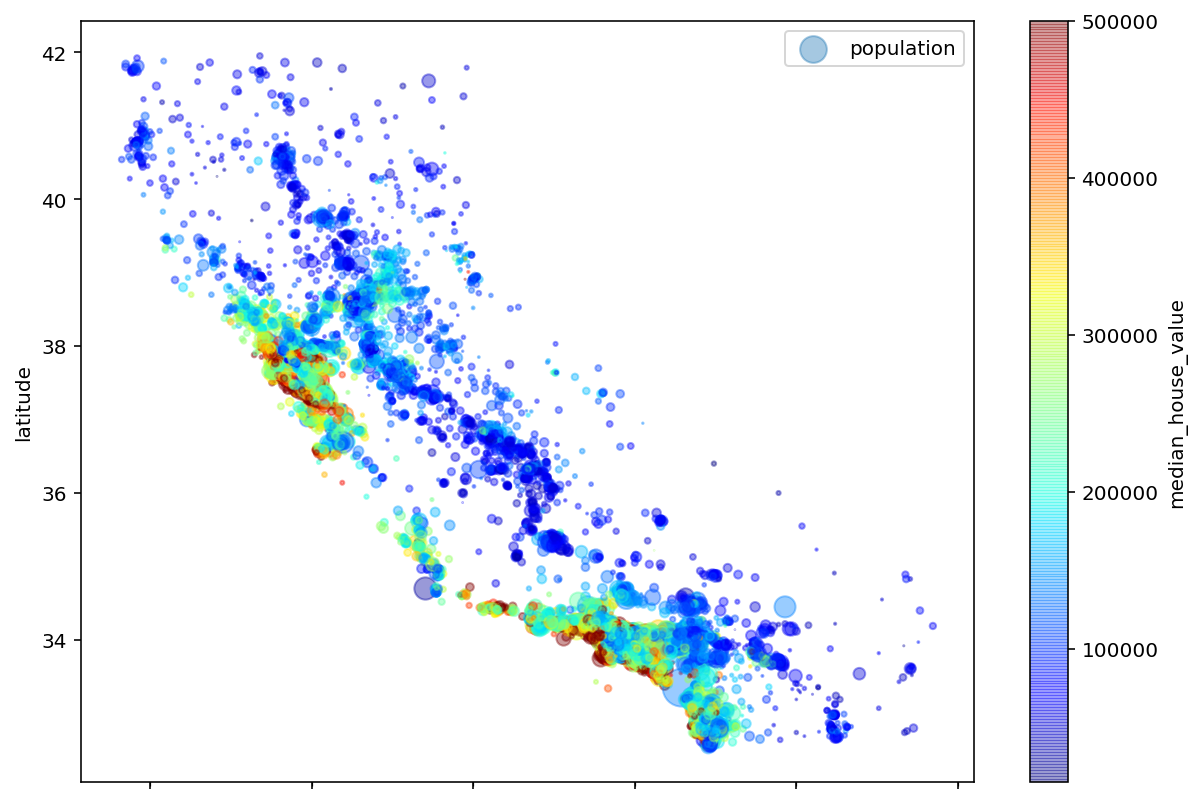

In [14]:
## s:在是画散点图的时候，表示点的大小
## c:在是画散点图的时候，表示颜色
## cmap:设置颜色渐变
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s=housing["population"]/100,label="population", figsize=(10,7),
              c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

### 相关度

In [15]:
#当数据不大时，可以通过它来查看样本所有特征之间的标准相关系数(pearson相似度)，且它只能表示线性相关，对于非线性相关无能为力
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
print(corr_matrix["median_income"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64
median_income         1.000000
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64


#### 散点图矩阵分析

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b4c4748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd00cf8>]], dtype=object)

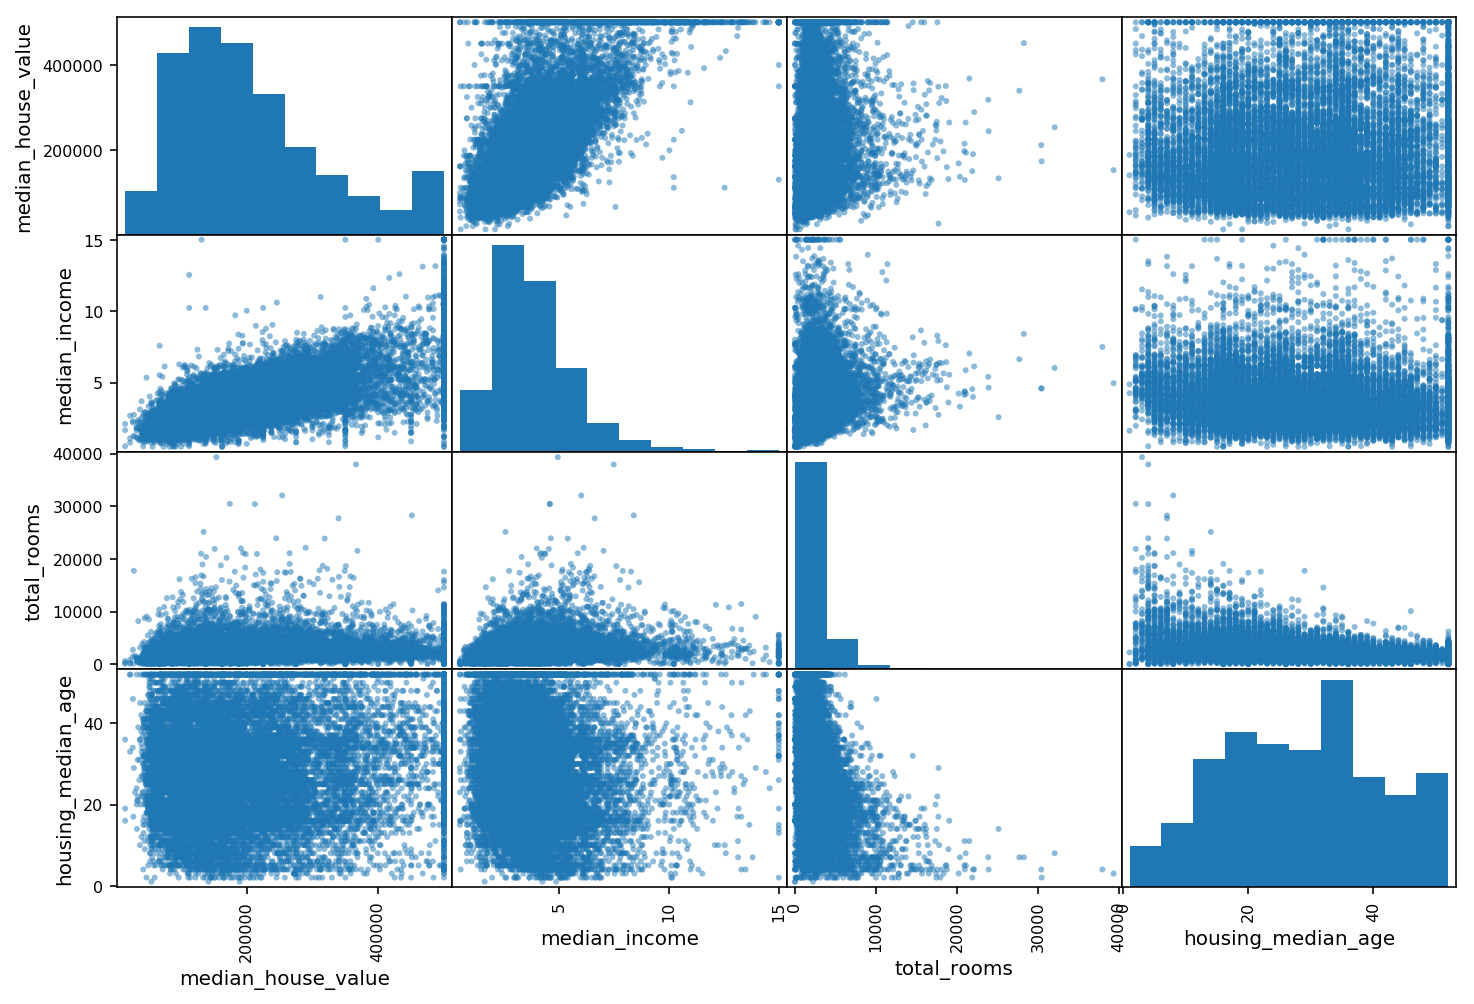

In [16]:
#通过图表示的方法看相关性，这里需要对列表进行限制否则多个特征之间22图会成倍出现
#对于自己和自己直接通过直方图限制，由于对角线散列图并没有意义
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

### 特征组合

In [17]:
# 有些特征并不好用，因此需要结合使用
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_households"] = housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_room               -0.259984
Name: median_house_value, dtype: float64

## 数据准备
### 取空值行

In [18]:
housing[housing.isnull().values==True].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_room,population_per_households
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.571135,NaN,2.254446
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN,6.371389,NaN,4.178817
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,264400.0,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN,5.064767,NaN,2.588083
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,287100.0,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND,5.511509,NaN,2.657289
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN,4.866192,NaN,2.468327
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,191000.0,<1H OCEAN,4.866192,NaN,2.468327


In [19]:
#数据准备
housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [20]:
print(housing.shape)
print(housing_label.shape)

(16512, 9)
(16512,)


### 数据清理

In [21]:
#处理空值：1.去掉对应区域；2.去掉整个属性；3.设置这个值为某些特殊值(如:0、均值、中位数等)
housing.dropna(subset=["total_bedrooms"]) #option1
housing.drop("total_bedrooms",axis=1) #option2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) #option3 一般需要保存起来用在测试和预测时为空的填充
housing["total_bedrooms"].head(10)
print(housing.shape)

(16512, 9)


In [22]:
# sklearn提供的方便处理缺失值的类
from sklearn.preprocessing import  Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity",axis=1)
#简单计算每个属性的中位数
imputer.fit(housing_num)
#每个属性的中位数
print(imputer.statistics_)
print(housing_num.median().values)
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
housing_tr[housing_tr.isnull().values==True].head(10).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


### sklearn设计规范
#### 1.一致性
##### 1.1评估器:所有对象共享一致性的简单接口。所有基于数据集可以评估一些参数的对象都叫做估计器，使用fit(dataset)，并且它只包使用一个数据集作为参数（或是为监督方法使用2个；第二个是标记集合），用于指导评估过程的参数叫做超参（在imputer中为strategy），它必须被作为一个市里变量被设置（一般是通过构造函数）
##### 1.2.转换:一些被称为转换器的评估器也可以用于转换数据集（如imputer）。它们在数据集上使用transform(dataset)方法,返回转换后的数据集。转换一般依赖于学习参数。所有的转换器有一个通用的方式fit_transform方法，它等同于使用fit然后使用transform（有时候它优化的更好比分开执行它们）
##### 1.3.预测器:一些有能力预测数据集的评估器叫做预测器。（如:LinearRegression模型），它有一个predict方法，用来根据数据集中新的实例预测对应的值。并且它还有一个score方法用来评估在给定测试集上的质量。

#### 2.检测
##### 2.1.所有评估器的超参都可以通过公共的实例变量直接获取（如：imputer.strategy)，并且所有的评估器的被学习参数也可以通过一个后缀_同样获取(如：imputer.statistics_)

#### 3.防扩散
##### 3.1.数据集由Numpy arrays或是SciPy sparse matrics表示，超参都是有规律的Python字符串或是数字表示

#### 4.组成
##### 4.1.现有的积木都是尽可能的被重用。如可以很容易的创建一个Pipeline估计器从任意一串转换器到最终的估计器。

#### 5.合理的违约
##### 5.1.sklearn提供了大部分合理的默认值，可以很容易且快速的创建一个基础工作系统

In [24]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


### 处理文本和类别属性

In [25]:
# 分类属性编码
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)
# 上述问题：机器学习一般假定2个相近的值更相近，因此这样的离散属性在这里可能并不好用

[0 0 4 ..., 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [26]:
# OneHotEncoder只能用于将整数类别值变成one-hot向量
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#返回的是SciPy的稀疏矩阵,在上千位的时候可以很好的节省空间
housing_cat_1hot
#housing_cat_1hot.toarray() #转成密集型向量

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
#结合上面2个的方法
from sklearn.preprocessing import LabelBinarizer
# 默认用密集向量，可以通过参数sparse_output=True变成稀疏向量
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### 自定义转换器

In [28]:
# BaseEstimator是评估器的基类，TransformerMixin默认提供了fit_transform的组合
from sklearn.base import BaseEstimator,TransformerMixin

room_ix,bedroom_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    # 一定要默认构造参数
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,room_ix] / X[:,household_ix]
        population_per_household  =  X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix]/X[:,room_ix]
            #np.c_是将多个矩阵按左右合并，np.r_是将列表按上下合并
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

### 特征缩放

In [29]:
#此步骤非必须，但是很重要，一般有min-max缩放和standardization
#1.min-max:略
#2.标准化: (x-mean)/variance,不同于min-max它不会将值绑定到一个具体的范围,因此在某些算法上可能存在问题（如：神经网络经常希望值在0-1之间）,但是它不会被异常点带偏
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler(feature_range=(-1,1))
total_bedrooms_minmax = scaler.fit_transform(housing[["total_bedrooms"]])

#total_bedrooms_minmax = scaler.fit_transform(housing["total_bedrooms"]) 不可执行是单维度的
print(total_bedrooms_minmax)
scaler = StandardScaler()
total_bedrooms_standard = scaler.fit_transform(housing[["total_bedrooms"]])
print(total_bedrooms_standard)

[[-0.88756443]
 [-0.96585052]
 [-0.84890464]
 ..., 
 [-0.71971649]
 [-0.87822165]
 [-0.78092784]]
[[-0.44579584]
 [-1.03462064]
 [-0.15501816]
 ..., 
 [ 0.81666391]
 [-0.37552457]
 [ 0.35626592]]


In [30]:
housing[["total_bedrooms"]].head()

,total_bedrooms
17606,351.0
18632,108.0
14650,471.0
3230,371.0
3555,1525.0


### 转换器管道

In [31]:
# 由于需要执行很多步骤的转换操作，因此sklearn直接提供管道操作用来有序转换
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("imputer",Imputer(strategy="median")),
    ("attribs",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [32]:
#针对不同类型数据处理使用pipeline，这里采用FeatureUnion的方式对数据进行合并
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names): #可以为列表
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values #返回的为numpy array

class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imput',Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ("selector",DataFrameSelector(cat_attribs)),
    # 由于sklearn官方升级给的方法有3个参数 ("label_binarizer",LabelBinarizer())
    ("label_binarizer",MyLabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(16512, 16)

In [33]:
a=DataFrameSelector(cat_attribs)
a.fit_transform(housing)

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['NEAR OCEAN'],
       ..., 
       ['INLAND'],
       ['<1H OCEAN'],
       ['NEAR BAY']], dtype=object)

## 选择并训练模型
### 训练集上的训练和评估

In [34]:
# 线性模型
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
housing_prepared.shape
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]

In [36]:
some_data_prepared = full_pipeline.transform(some_data)

In [37]:
print("Predictions:\t",lin_reg.predict(some_data_prepared))

Predictions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [38]:
print("Labels:\t",list(some_labels))

Labels:	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [39]:
#平方损失
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

In [40]:
#决策树模型
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [53]:
#交叉验证（针对小数据集）
from sklearn.model_selection import cross_val_score
# 训练集切成10分，训练和评估10次决策树，选9个部分训练，留一个部分评估
scores = cross_val_score(tree_reg,housing_prepared,housing_label,
                         scoring="neg_mean_squared_error",cv=10)

rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    
display_scores(rmse_scores)

Scores: [ 69461.9675061   66213.90963188  70704.20907227  68706.7327958
  68885.82111799  74473.83005198  70555.80348639  70744.34101055
  77357.3941456   69739.60969253]
Mean: 70684.3618511
Standard deviation: 2973.67552001


In [56]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_label)
scores = cross_val_score(forest_reg,housing_prepared,housing_label,
                         scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [ 52057.80963553  49621.62020221  51354.393687    55742.08483758
  51005.49159193  56383.94912971  50777.15396744  50943.54546665
  56356.89454616  51958.52406379]
Mean: 52620.1467128
Standard deviation: 2409.10720582


### 调好模型
#### 网格搜索

In [73]:
# 网格搜索
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [74]:
# 最好的模型参数
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [75]:
# 最好的模型
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.0579173 {'max_features': 2, 'n_estimators': 3}
55627.1617131 {'max_features': 2, 'n_estimators': 10}
53384.5786764 {'max_features': 2, 'n_estimators': 30}
60965.9918593 {'max_features': 4, 'n_estimators': 3}
52740.9824853 {'max_features': 4, 'n_estimators': 10}
50377.3444096 {'max_features': 4, 'n_estimators': 30}
58663.8473337 {'max_features': 6, 'n_estimators': 3}
52006.1535597 {'max_features': 6, 'n_estimators': 10}
50146.4659642 {'max_features': 6, 'n_estimators': 30}
57869.2550403 {'max_features': 8, 'n_estimators': 3}
51711.0944366 {'max_features': 8, 'n_estimators': 10}
49682.2534594 {'max_features': 8, 'n_estimators': 30}
62895.0888899 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.1448439 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.3995947 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.0109108 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57490.6129561 {'bootstrap': False, 'max_features': 4, 'n_estim

In [77]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.060827,0.004369,-4.053749e+09,-1.105559e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-3.837622e+09,...,-4.196408e+09,-1.116550e+09,-3.903319e+09,-1.112342e+09,-4.184325e+09,-1.129650e+09,0.001668,0.000449,1.519609e+08,2.220402e+07
1,0.201263,0.012466,-3.094381e+09,-5.818785e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-3.047771e+09,...,-3.130196e+09,-5.776964e+08,-2.865188e+09,-5.716332e+08,-3.173856e+09,-5.802501e+08,0.005567,0.000244,1.327046e+08,7.345821e+06
2,0.628476,0.036563,-2.849913e+09,-4.394734e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-2.689185e+09,...,-2.948330e+09,-4.371702e+08,-2.619995e+09,-4.376955e+08,-2.970968e+09,-4.452654e+08,0.012798,0.002059,1.626879e+08,2.966320e+06
3,0.101911,0.004477,-3.716852e+09,-9.848396e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",16,-3.730181e+09,...,-3.734515e+09,-9.169425e+08,-3.418747e+09,-1.037400e+09,-3.913907e+09,-9.707739e+08,0.003764,0.000287,1.631421e+08,4.084607e+07
4,0.342517,0.011967,-2.781611e+09,-5.163863e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",8,-2.666283e+09,...,-2.892276e+09,-4.962893e+08,-2.616813e+09,-5.436192e+08,-2.948207e+09,-5.160297e+08,0.008807,0.000921,1.268562e+08,1.542862e+07
5,1.012498,0.031917,-2.537877e+09,-3.879289e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.387153e+09,...,-2.666426e+09,-3.790867e+08,-2.398071e+09,-4.040957e+08,-2.649316e+09,-3.845520e+08,0.033030,0.002906,1.214603e+08,8.571233e+06
6,0.149801,0.004541,-3.441447e+09,-9.023976e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",14,-3.119657e+09,...,-3.592772e+09,-9.353135e+08,-3.328934e+09,-9.009801e+08,-3.579607e+09,-8.624664e+08,0.010358,0.000767,1.893141e+08,2.591445e+07
7,0.452500,0.012220,-2.704640e+09,-5.013349e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",6,-2.549663e+09,...,-2.762720e+09,-4.994664e+08,-2.521134e+09,-4.990325e+08,-2.907667e+09,-5.055542e+08,0.005738,0.000953,1.471542e+08,3.100456e+06
8,1.371619,0.031519,-2.514668e+09,-3.841296e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",2,-2.370010e+09,...,-2.607703e+09,-3.805218e+08,-2.350953e+09,-3.856095e+08,-2.661059e+09,-3.901917e+08,0.018482,0.001940,1.285063e+08,3.617057e+06
9,0.173351,0.003824,-3.348851e+09,-8.883545e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.353504e+09,...,-3.402843e+09,-8.603321e+08,-3.129307e+09,-8.881964e+08,-3.510047e+09,-9.151287e+08,0.005093,0.000191,1.241864e+08,2.750227e+07


In [79]:
# 随机网格搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_label)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1cbdf588>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1cbdfb38>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [80]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.6572329 {'max_features': 7, 'n_estimators': 180}
51389.8529571 {'max_features': 5, 'n_estimators': 15}
50796.1204598 {'max_features': 3, 'n_estimators': 72}
50835.0993204 {'max_features': 5, 'n_estimators': 21}
49280.9011789 {'max_features': 7, 'n_estimators': 122}
50774.8667904 {'max_features': 3, 'n_estimators': 75}
50682.7500124 {'max_features': 3, 'n_estimators': 88}
49608.9406129 {'max_features': 5, 'n_estimators': 100}
50473.5764283 {'max_features': 3, 'n_estimators': 150}
64429.7638049 {'max_features': 5, 'n_estimators': 2}


#### Ensemble方法

In [81]:
# 分析最好的模型和他们的缺失
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.33442355e-02,   6.29090705e-02,   4.11437985e-02,
         1.46726854e-02,   1.41064835e-02,   1.48742809e-02,
         1.42575993e-02,   3.66158981e-01,   5.64191792e-02,
         1.08792957e-01,   5.33510773e-02,   1.03114883e-02,
         1.64780994e-01,   6.02803867e-05,   1.96041560e-03,
         2.85647464e-03])

In [83]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813418, 'median_income'),
 (0.16478099356159051, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.073344235516012421, 'longitude'),
 (0.062909070482620302, 'latitude'),
 (0.056419179181954007, 'rooms_per_hhold'),
 (0.053351077347675809, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.0028564746373201579, 'NEAR OCEAN'),
 (0.0019604155994780701, 'NEAR BAY'),
 (6.0280386727365991e-05, 'ISLAND')]

#### 测试集合评估

In [84]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [85]:
final_rmse

66012.431443289068